In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# Summary Statistics of dataset
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


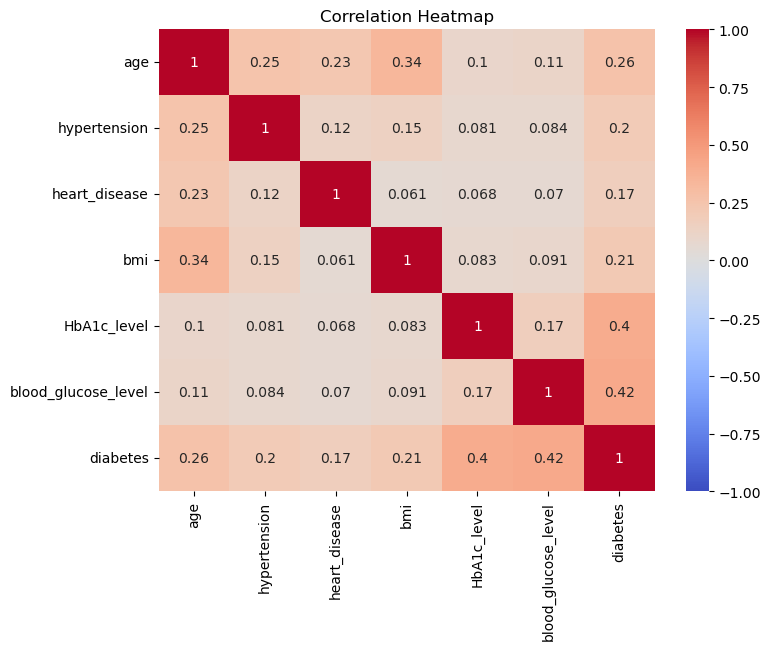

In [6]:
# Looking at the correlation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

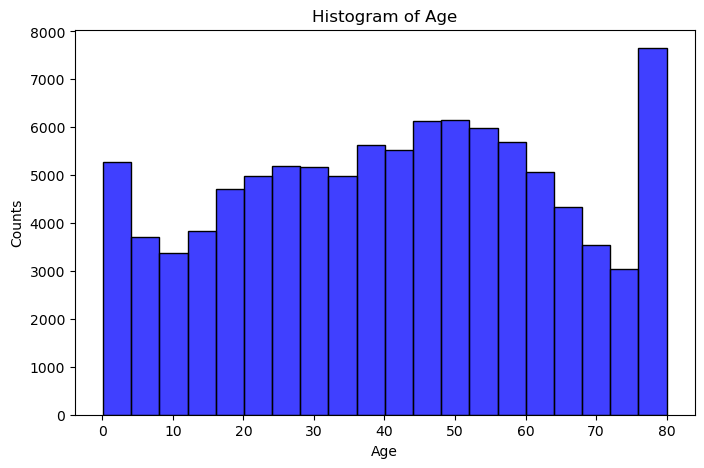

In [7]:
# Looking at the histogram of Age
plt.figure(figsize=(8,5))
sns.histplot(df['age'],color='blue',bins=20)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Histogram of Age')
plt.show()

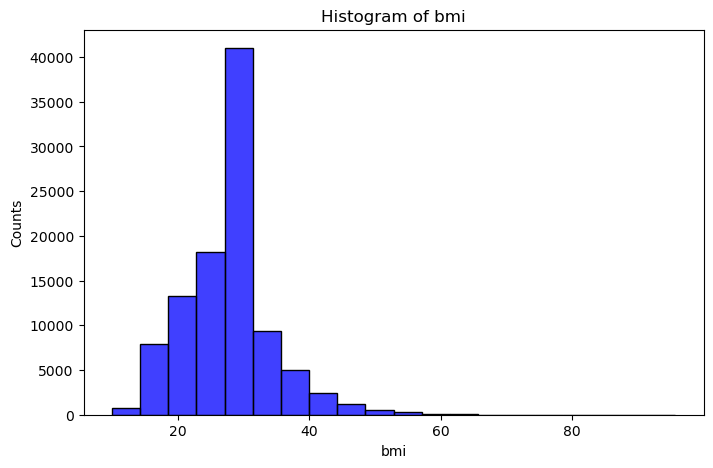

In [8]:
# Looking at the histogram of bmi
plt.figure(figsize=(8,5))
sns.histplot(df['bmi'],color='blue',bins=20)
plt.xlabel('bmi')
plt.ylabel('Counts')
plt.title('Histogram of bmi')
plt.show()

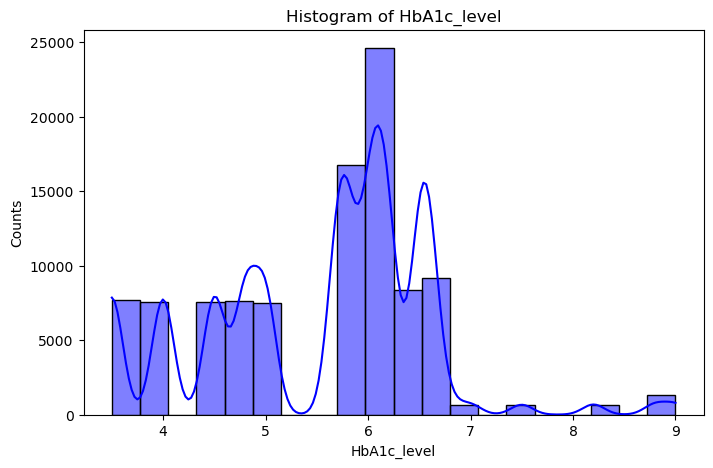

In [9]:
# Looking at the histogram of HbA1c_level
plt.figure(figsize=(8,5))
sns.histplot(df['HbA1c_level'],kde=True,color='blue',bins=20)
plt.xlabel('HbA1c_level')
plt.ylabel('Counts')
plt.title('Histogram of HbA1c_level')
plt.show()

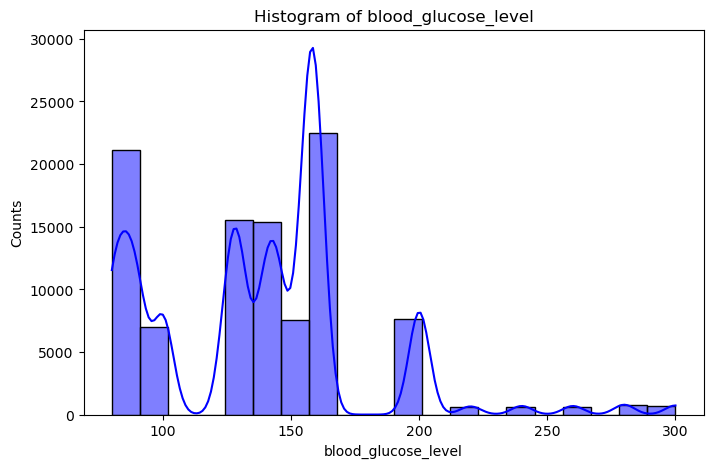

In [10]:
# Looking at the histogram of blood sugar level
plt.figure(figsize=(8,5))
sns.histplot(df['blood_glucose_level'],kde=True,color='blue',bins=20)
plt.xlabel('blood_glucose_level')
plt.ylabel('Counts')
plt.title('Histogram of blood_glucose_level')
plt.show()

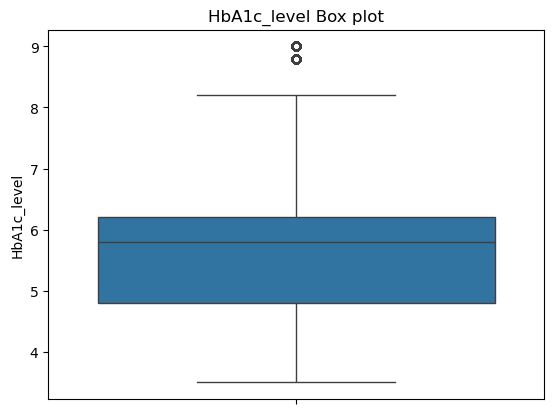

In [11]:
sns.boxplot(df['HbA1c_level'])
plt.title('HbA1c_level Box plot')
plt.show()

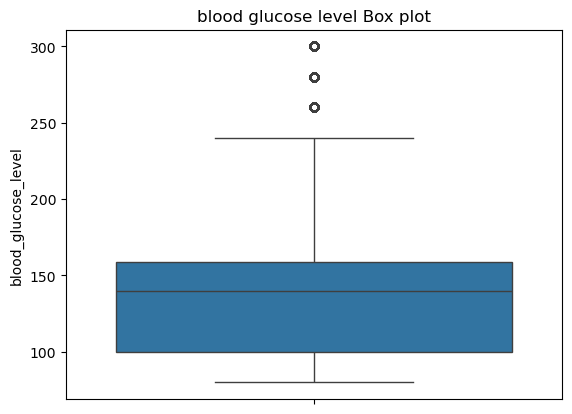

In [12]:
sns.boxplot(df['blood_glucose_level'])
plt.title('blood glucose level Box plot')
plt.show()

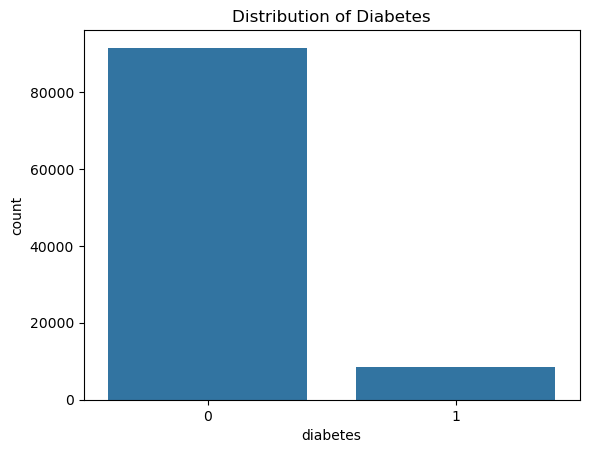

In [13]:
# looking at distribution of diabetes
sns.countplot(x='diabetes',data=df)
plt.title('Distribution of Diabetes')
plt.show()

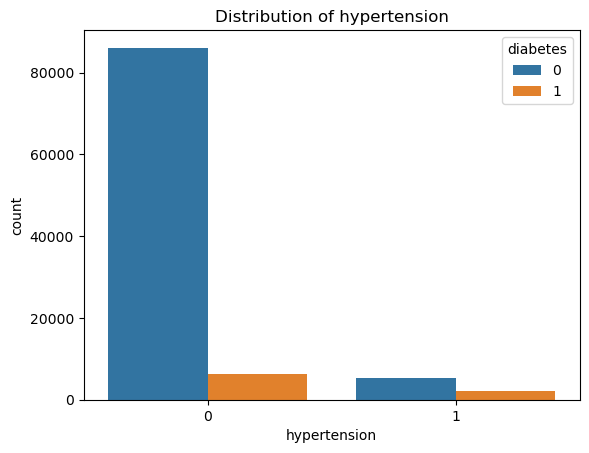

In [14]:
# Looking at distribution of hypertension
sns.countplot(x='hypertension',data=df,hue='diabetes')
plt.title('Distribution of hypertension')
plt.show()

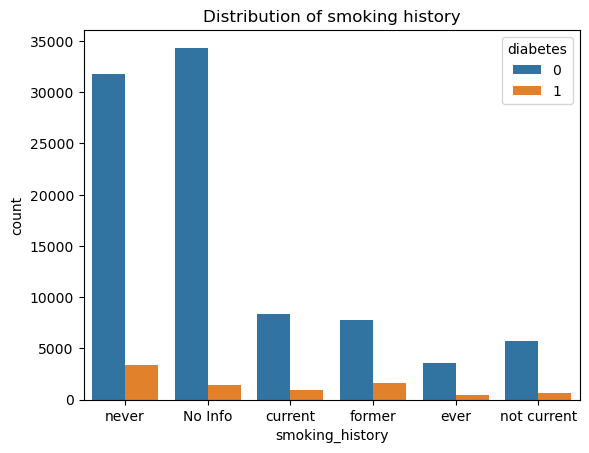

In [15]:
# Looking at distribution of smoking status
sns.countplot(x='smoking_history',data=df,hue='diabetes')
plt.title('Distribution of smoking history')
plt.show()

In [16]:
# encoding the label 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

In [17]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [18]:
# Splitting the X and y 
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [19]:
# Splitting the dataset into training and testing set 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)

(80000, 8)


In [44]:
# Training the model on RandomForest 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
forest_classifier = RandomForestClassifier(n_estimators=100,criterion='gini',class_weight='balanced')
forest_classifier.fit(X_train[:70000],y_train[:70000])

RandomForestClassifier(class_weight='balanced')

In [45]:
# Checking  cross validation  score
from sklearn.model_selection import cross_val_score 
accuracy = cross_val_score(forest_classifier,X_train[70000:],y_train[70000:],scoring = 'accuracy',cv=5)
print(f'Accuracy: {accuracy.mean()} with variation among the score {accuracy.std()}')

Accuracy: 0.9699 with variation among the score 0.002083266665599972


In [46]:
# Training with Ada Booster
ada_classifier = AdaBoostClassifier(algorithm='SAMME')
ada_classifier.fit(X_train[:70000],y_train[:70000])

AdaBoostClassifier(algorithm='SAMME')

In [47]:
accuracy = cross_val_score(ada_classifier,X_train[70000:],y_train[70000:],scoring = 'accuracy',cv=5)
print(f'Accuracy: {accuracy.mean()} with variation among the score {accuracy.std()}')

Accuracy: 0.9710000000000001 with variation among the score 0.001581138830084191


In [48]:
# hyperparameter tunning 
from sklearn.model_selection import RandomizedSearchCV
parameter = {
    'n_estimators' : [50,100,150,200],
    'learning_rate' : [0.001,0.1,1],
}
random_search = RandomizedSearchCV(ada_classifier,param_distributions=parameter,scoring='accuracy',cv=5,random_state=42,n_jobs=-1)
random_search.fit(X_train,y_train)
# best parameter
print(f'Best Parameter: {random_search.best_params_}')
#best score
print(f'Best Parameter: {random_search.best_score_}')

Best Parameter: {'n_estimators': 50, 'learning_rate': 1}
Best Parameter: 0.9718


Report:               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



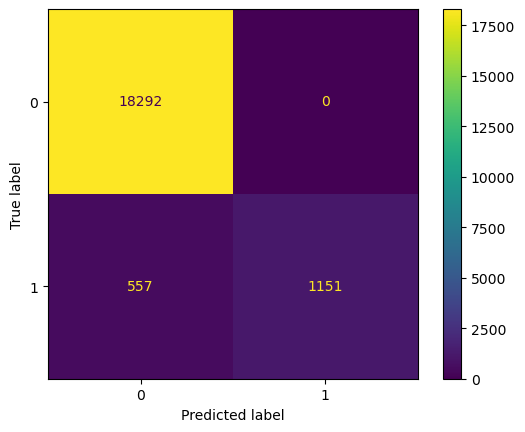

In [49]:
# Testing on test set 
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
model = random_search.best_estimator_
y_pred = model.predict(X_test)
report = classification_report(y_test,y_pred)
print(f'Report: {report}')
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [52]:
parameter = {
    'n_estimators' : [50,100,150,200],
    'learning_rate' : [0.001,0.1,1],
}
random_search = RandomizedSearchCV(ada_classifier,param_distributions=parameter,scoring='recall',cv=5,random_state=42,n_jobs=-1)
random_search.fit(X_train,y_train)
# best parameter
print(f'Best Parameter: {random_search.best_params_}')
#best score
print(f'Best recall: {random_search.best_score_}')

Best Parameter: {'n_estimators': 200, 'learning_rate': 1}
Best recall: 0.6791810663866376


In [53]:
parameter = {
    'n_estimators' : [50,100,150,200],
    'criterion': ['gini','entropy','log_loss'],
    'max_depth' : [3,5,7]
}
random_search = RandomizedSearchCV(forest_classifier,param_distributions=parameter,scoring='recall',cv=5,random_state=42,n_jobs=-1)
random_search.fit(X_train,y_train)
# best parameter
print(f'Best Parameter: {random_search.best_params_}')
#best score
print(f'Best recall: {random_search.best_score_}')

Best Parameter: {'n_estimators': 50, 'max_depth': 7, 'criterion': 'gini'}
Best recall: 0.9068058793121946


In [54]:
model = random_search.best_estimator_
accuracy = cross_val_score(model,X_train[70000:],y_train[70000:],scoring = 'accuracy',cv=5)
print(f'Accuracy: {accuracy.mean()} with variation among the score {accuracy.std()}')

Accuracy: 0.9098 with variation among the score 0.005626721958654105


Report:               precision    recall  f1-score   support

           0       0.99      0.90      0.94     18292
           1       0.45      0.91      0.60      1708

    accuracy                           0.90     20000
   macro avg       0.72      0.90      0.77     20000
weighted avg       0.94      0.90      0.91     20000



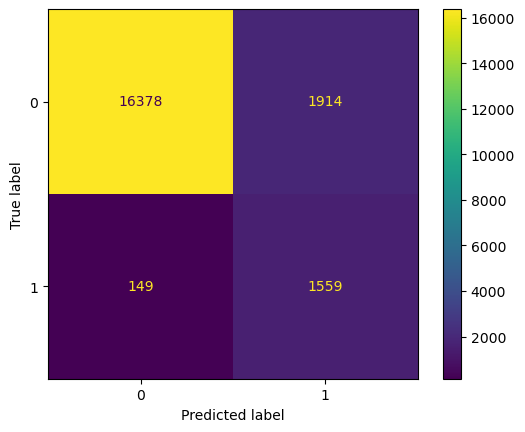

In [55]:
y_pred = model.predict(X_test)
report = classification_report(y_test,y_pred)
print(f'Report: {report}')
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)